# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# 2. Read Data

In [2]:
data = pd.read_csv('sound_to_csv/cat_dog_dataset.csv')

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_8183,pixel_8184,pixel_8185,pixel_8186,pixel_8187,pixel_8188,pixel_8189,pixel_8190,pixel_8191,label
0,-79.602509,-78.703339,-75.710220,-79.497986,-79.989914,-78.267715,-78.394524,-80.000000,-80.000000,-72.545074,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,cat
1,-80.000000,-80.000000,-66.355614,-59.159370,-43.926155,-55.072250,-73.129517,-80.000000,-74.959351,-56.905140,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,cat
2,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-79.731453,-79.313713,-78.895966,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,cat
3,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,cat
4,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,dog
273,-80.000000,-77.922005,-75.707809,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,dog
274,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,dog
275,-79.877312,-71.642929,-46.857010,-47.497482,-54.928242,-49.587021,-48.903427,-47.383080,-52.390427,-52.939766,...,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,dog


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Columns: 8193 entries, pixel_0 to label
dtypes: float64(8192), object(1)
memory usage: 17.3+ MB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_8182,pixel_8183,pixel_8184,pixel_8185,pixel_8186,pixel_8187,pixel_8188,pixel_8189,pixel_8190,pixel_8191
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,-75.960172,-74.352064,-73.268885,-73.278650,-73.155587,-73.215246,-73.109967,-73.164568,-72.808128,-72.612024,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
std,9.897928,11.403480,12.425619,12.530003,12.862007,12.706503,12.801425,12.688064,13.190954,13.178017,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
min,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,...,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008
25%,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
50%,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
75%,-79.342644,-76.549866,-72.794357,-73.025360,-72.894760,-73.220886,-72.468605,-73.612885,-73.860756,-71.739555,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
max,-24.115877,-26.564022,-24.000797,-16.702932,-13.511412,-17.305256,-19.522568,-23.756063,-18.200558,-16.645889,...,-79.999992,-79.999992,-79.999992,-79.999992,-79.999992,-79.999992,-79.999992,-79.999992,-79.999992,-79.999992


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'label'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [11]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [12]:
clf = MLPClassifier(
    hidden_layer_sizes=(10),
    activation='relu',
    learning_rate_init=0.0001,
    max_iter=500,
    batch_size=X_train_scaled.shape[0]
)

## 6.2. Train Model

In [13]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(batch_size=221, hidden_layer_sizes=10, learning_rate_init=0.0001,
              max_iter=500)

## 6.3. Loss Curve

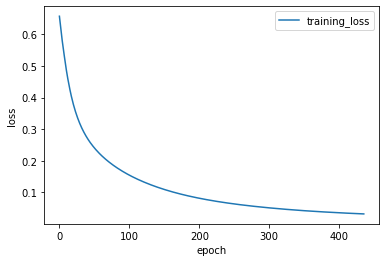

In [14]:
plt.plot(clf.loss_curve_, label='training_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [15]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(8192, 10)
(10, 1)


In [16]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(10,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [17]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [18]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

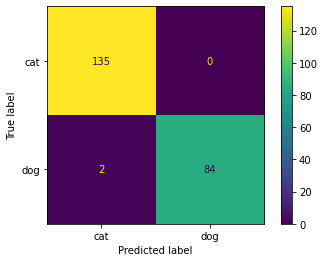

In [19]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [20]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
cat,0.985401,1.000000,0.992647,135.00000
dog,1.000000,0.976744,0.988235,86.00000
accuracy,0.990950,0.990950,0.990950,0.99095
macro avg,0.992701,0.988372,0.990441,221.00000
weighted avg,0.991082,0.990950,0.990930,221.00000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

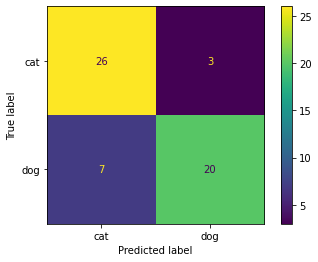

In [22]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [23]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
cat,0.787879,0.896552,0.838710,29.000000
dog,0.869565,0.740741,0.800000,27.000000
accuracy,0.821429,0.821429,0.821429,0.821429
macro avg,0.828722,0.818646,0.819355,56.000000
weighted avg,0.827263,0.821429,0.820046,56.000000


# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((clf, scaler), open('voice_command_model.pickle', 'wb'))